In [1]:
#PROJECT INTRODUCTION and WHAT IT IS ABOUT

#For this project I will be exploring publicly available data from LendingClub.com. Lending Club connects people who need
#money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people
#who showed a profile of having a high probability of paying you back. We will try to create a model that 
#will help predict this.

#Lending club had a very interesting year in 2016, so let's check out some of their data and keep the context in mind. 
#This data is from before they even went public.

#I will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back 
#their loan in full.

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
loan=pd.read_csv('loan_data.csv')

In [7]:
#Let's start to know what's our data all about
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [10]:
 #Here's moving on to some exploratory data analysis and visualisation to get some insights from our data 

Text(0.5, 0, 'FICO')

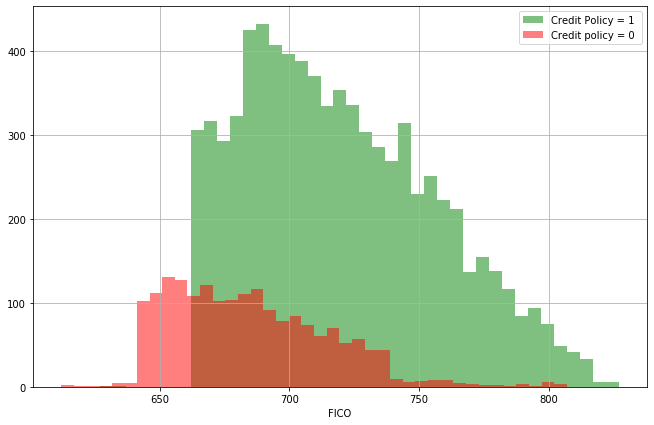

In [14]:
 #A histogram of two FICO distributions on top of each other, one for each credit.policy outcome
plt.figure(figsize=(11,7))
loan[loan['credit.policy']==1]['fico'].hist(bins=40,color='green',label='Credit Policy = 1 ',alpha=0.5)
loan[loan['credit.policy']==0]['fico'].hist(bins=40,color='red',label='Credit policy = 0',alpha=0.5)
plt.legend()
plt.xlabel('FICO')

In [15]:
#We can see that the fico scores are directly proportional to the credit policy criteria,
#We can also see that there is some kind of a cut off point around 660 fico score, below which credit policy is not matched

Text(0.5, 0, 'FICO')

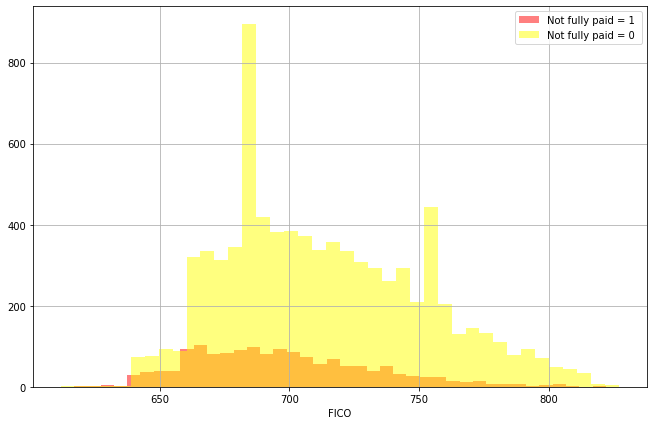

In [34]:
plt.figure(figsize=(11,7))
loan[loan['not.fully.paid']==1]['fico'].hist(bins=40,color='red',label='Not fully paid = 1 ',alpha=0.5)
loan[loan['not.fully.paid']==0]['fico'].hist(bins=40,color='yellow',label='Not fully paid = 0',alpha=0.5)
plt.legend()
plt.xlabel('FICO')

In [19]:
#Seems like most people have paid up, good work people, keep up the grind

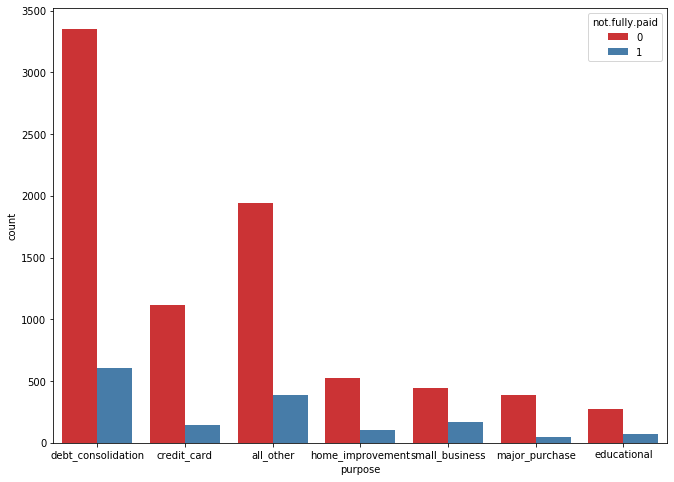

In [21]:
#A countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid
plt.figure(figsize=(11,8))
sns.countplot(x='purpose',data=loan,hue='not.fully.paid',palette='Set1')

In [22]:
#Hmm, so we observe that debt consolidation is the most common reason of wanting a loan


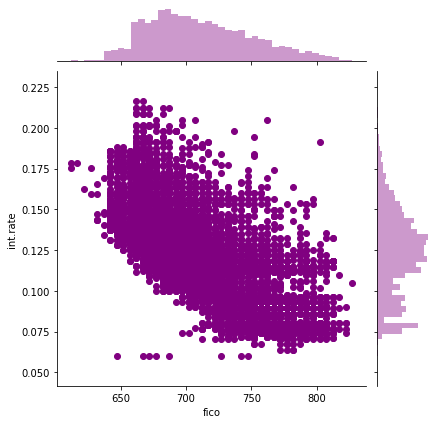

In [25]:
#Let's see the trend between FICO score and interest rate with the following jointplot.
sns.jointplot(x='fico',y='int.rate',data=loan,color='purple')

In [26]:
#Now what we observe is as the fico score increases you have better credit,
#so the interest rate is probably going to go lower . Makes sense.

In [27]:
# The following lmplots are to see if the trend differed between not.fully.paid and credit.policy.

<Figure size 864x576 with 0 Axes>

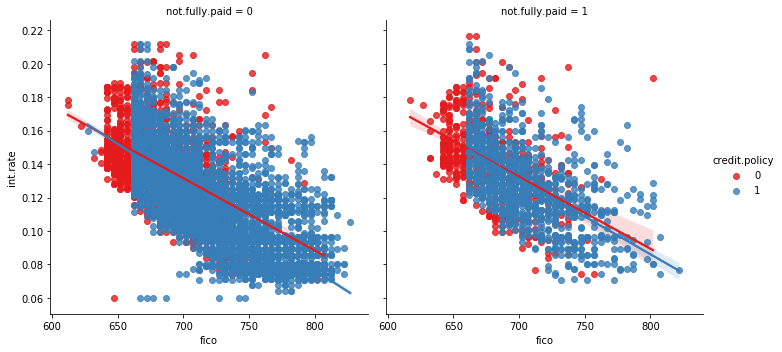

In [30]:
plt.figure(figsize=(12,8))
sns.lmplot(x='fico',y='int.rate',data=loan,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [31]:
#Behavior seems pretty much the same, on both paid and not paid sides , based on the credit policy

In [32]:
#We've done some good amount of exploratory data analysis


In [33]:
#Let's get ready to set up our data for our Random Forest Classification Model

In [35]:
#Notice that the purpose column as categorical
#That means we need to transform them using dummy variables so sklearn will be able to understand them. 
#Let's do this in one clean step using pd.get_dummies.

In [36]:
category_feats=['purpose']

In [37]:
set_data=pd.get_dummies(loan,columns=category_feats,drop_first=True)

In [38]:
set_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [39]:
#We can see that the purpose column is disintegrated 

In [40]:
set_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [41]:
#So our data is ready , lets move forward
#Time to split our data into a training set and a testing set.

In [42]:
from sklearn.model_selection import train_test_split

In [45]:
#Splitting up our data
X=set_data.drop('not.fully.paid',axis=1)
y=set_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
#Lets begin with a single tree, and then we'll move forward to random forrests
dtree=DecisionTreeClassifier()

In [48]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
#Predictions and Evaluation of Decision Tree

In [50]:
dtree_pred=dtree.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[1988  443]
 [ 336  107]]


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [53]:
#Training the Random Forest model
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc=RandomForestClassifier(n_estimators=350)

In [55]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
rfc_pred=rfc.predict(X_test)

In [58]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[2423    8]
 [ 431   12]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.60      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [59]:
#What performed better the random forest or the decision tree??


In [61]:
#Well it really depends what metric we are trying to optimise for
#Look at recall,a single decision tree did well for class 1 than random forrest
#So it depends what the cost associated with each of the metrics
#overall average of random forrest was better, but not alike in some particuar metrics
#There comes the business domain experience 